In [1]:
%matplotlib widget
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from Individual import Individual, FTYPE
from Population import Population
from RNASeqDeconvolution import RNASeqDeconvolution
from main import compare, set_parameters, compare_to_true_results

# TRY 1

In [20]:
# run and display output phenotype
experiment = set_parameters({"mut_prob": 0.04,
                                 "crossover_prob": 0.8,
                                 "mut_standard_deviation": 0.7,
                                 "pop_size": 200,
                                 "satisfactory": 1e-5,
                                 "stagnation_limit": 200,
                                 "stagnation_diff": 1e-6,
                                 "tournament_participants": 3,
                                 "win_probability": 0.85,
                                 "init_sigma": 2.5,
                                 "carry_over": 10,
                                 "max_iter": 10000,
                                 "niche_num": 2,
                                 "migration_interval": 200,
                                 "migrator_num": 5},
                                True)
experiment.run(True, 0, False)
phen = experiment.result

running RNA-seq deconvolution:   0%|                                                                          …

In [21]:
# fitness score 27868
print(experiment.result_fitness_score)

2231293.4715364776


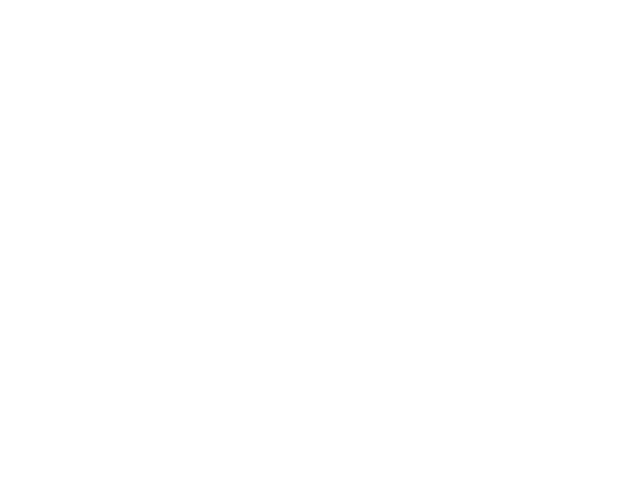

In [22]:
# best/worst score per iteration graph
fig, ax = plt.subplots()
best = experiment.best_history
# mean = experiment.mean_history
diversity = experiment.diversity_history
l = np.arange(len(best))
line1 = ax.plot(l, best, label="best fitness", zorder=10)
line2 = ax.plot(l, diversity, label="diversity", zorder=1)
# line3 = ax.plot(l, mean, label="mean fitness", zorder=2)
# ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness score")
# ax.set_title("Best/Worst score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [23]:
compare_to_true_results(phen)

,Monocytes.C,NK,T.CD8.Memory,T.CD4.Naive,T.CD8.Naive,B.Naive,T.CD4.Memory,MAIT,T.gd.Vd2,Neutrophils.LD,T.gd.non.Vd2,Basophils.LD,Monocytes.NC.I,B.Memory,mDCs,pDCs,Plasmablasts,Unclassified
453W,-13.369142,-1.897210,3.473150,-5.156586,-5.327885,2.071847,-1.403330,4.125472,6.847487,4.291557,13.668853,4.259788,12.221927,7.507593,2.815200,9.287968,5.453711,11.147977
684C,-9.815653,-5.749131,-7.077998,2.182936,-6.693780,-2.566630,-14.439493,-2.740351,2.088977,8.856938,31.578910,-1.289463,6.765155,3.846025,12.602171,20.273817,1.663697,-2.445936
CR3L,-6.868792,15.526740,-3.596972,-9.049036,-4.350476,-1.865579,-5.290766,3.688193,13.271298,1.024040,2.447246,8.837759,3.951070,9.047825,9.386893,9.605663,5.672769,-1.492252
FLWA,-10.416744,-14.241731,13.030251,4.930552,11.276338,-2.465334,-10.040434,5.234612,4.732153,5.482071,10.237643,2.015082,7.348754,6.403227,8.528395,13.010827,2.219426,-2.053731
FY2H,-16.181678,2.663335,-1.582451,-0.373607,5.706498,7.292207,1.369460,11.045539,8.027076,-1.750844,-6.660583,8.677367,6.183861,5.597208,2.604977,9.407444,16.725898,-1.758292
CYFZ,-4.902796,-1.251491,-24.472968,-0.071416,6.204625,3.511168,-0.682018,13.117468,9.224228,8.680924,-1.714859,7.012610,3.728137,9.400770,11.443832,6.207044,6.458304,12.050161
925L,-6.679808,-0.526718,1.405759,1.539999,-1.272046,11.244893,-5.514555,5.319781,4.007869,5.941085,5.932412,10.139963,0.288202,3.473804,7.474133,8.949545,3.257512,14.091207
9JD4,-7.222544,-5.764037,4.230997,0.313729,0.672080,0.383744,-13.524880,5.886137,3.575541,4.502206,6.193797,13.456360,3.069864,9.129377,5.226819,2.566267,9.328593,-0.959920
G4YW,-7.672922,-1.966256,-3.203269,2.189225,3.645212,1.274007,-12.278189,6.110427,3.138930,2.156954,8.368847,2.802941,4.106966,6.772309,5.578467,4.613413,8.374887,15.204130
4DUY,-8.718197,0.047136,-5.096877,6.175159,5.016719,2.225427,-9.119658,3.425661,10.638977,7.007356,0.898684,5.749903,8.010273,3.290557,2.218649,-0.139861,21.294212,-6.979158


# TRY 2

In [34]:
# run and display output phenotype
experiment = set_parameters({"mut_prob": 0.001,
                                 "crossover_prob": 0.8,
                                 "mut_standard_deviation": 10,
                                 "pop_size": 100,
                                 "satisfactory": 1e-5,
                                 "stagnation_limit": 200,
                                 "stagnation_diff": 1e-6,
                                 "tournament_participants": 2,
                                 "win_probability": 0.95,
                                 "init_sigma": 2.5,
                                 "carry_over": 25,
                                 "max_iter": 20000,
                                 "niche_num": 1,
                                 "migration_interval": 200,
                                 "migrator_num": 5},
                                True)
experiment.run(True, 0, False)
phen = experiment.result

running RNA-seq deconvolution:   0%|                                                                          …

In [35]:
# fitness score
print(experiment.result_fitness_score)

2465909.2849714058


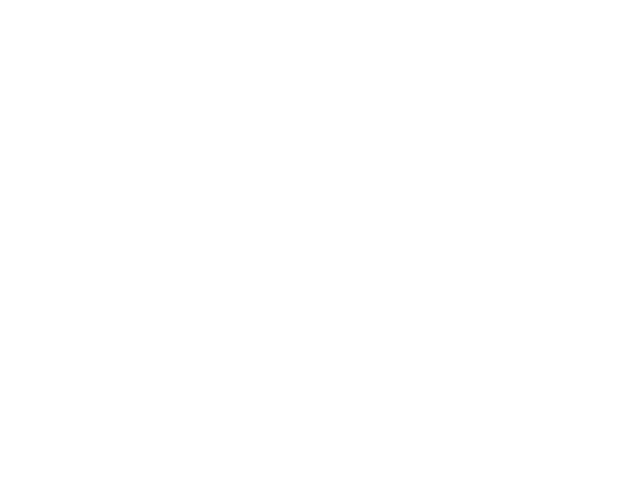

In [36]:
# best/worst score per iteration graph
fig, ax = plt.subplots()
best = experiment.best_history
# mean = experiment.mean_history
diversity = experiment.diversity_history
l = np.arange(len(best))
line1 = ax.plot(l, best, label="best fitness", zorder=10)
line2 = ax.plot(l, diversity, label="diversity", zorder=1)
# line3 = ax.plot(l, mean, label="mean fitness", zorder=2)
# ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness score")
# ax.set_title("Best/Worst score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
compare_to_true_results(phen)

# TRY 3

In [39]:
# run and display output phenotype
experiment = set_parameters({"mut_prob": 0.001,
                                 "crossover_prob": 0.8,
                                 "mut_standard_deviation": 10,
                                 "pop_size": 200,
                                 "satisfactory": 1e-5,
                                 "stagnation_limit": 200,
                                 "stagnation_diff": 1e-6,
                                 "tournament_participants": 2,
                                 "win_probability": 0.95,
                                 "init_sigma": 2.5,
                                 "carry_over": 25,
                                 "max_iter": 20000,
                                 "niche_num": 2,
                                 "migration_interval": 200,
                                 "migrator_num": 5},
                                True)
experiment.run(True, 0, False)
phen = experiment.result

running RNA-seq deconvolution:   0%|                                                                          …

In [38]:
# fitness score
print(experiment.result_fitness_score)

2311609.3653282407


In [ ]:
# best/worst score per iteration graph
fig, ax = plt.subplots()
best = experiment.best_history
# mean = experiment.mean_history
diversity = experiment.diversity_history
l = np.arange(len(best))
line1 = ax.plot(l, best, label="best fitness", zorder=10)
line2 = ax.plot(l, diversity, label="diversity", zorder=1)
# line3 = ax.plot(l, mean, label="mean fitness", zorder=2)
# ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness score")
# ax.set_title("Best/Worst score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
compare_to_true_results(phen)